In [2]:
# importing packages
import astropy.constants as ac
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [3]:
! pip install gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.9 MB/s eta 0:00:00
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99222 sha256=c85b200a08011fa2809c072ef13466af68a0cbf7cd404057b3fc6401a520b77a
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


In [4]:
t0 = 1266618172.4  #GW200224_222234

from gwpy.timeseries import TimeSeries # module
hdata = TimeSeries.fetch_open_data('H1', 1266618156, 1266618188) #getting the data from around the signal

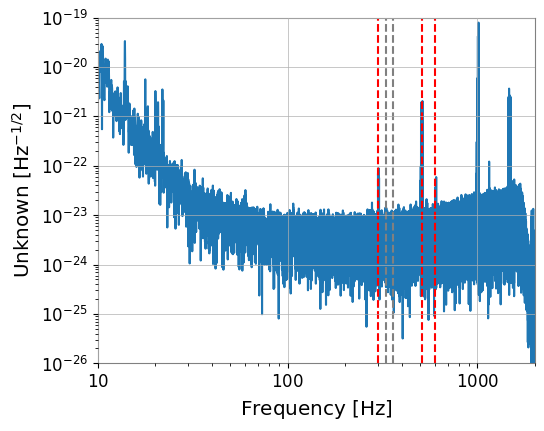

In [5]:
# -- Plot ASD
fig2 = hdata.asd().plot() # use fourier transform to show which frequencies show up the most
plt.xlim(10,2000)
ymin = 1e-26
ymax = 1e-19
plt.ylim(ymin, ymax)

# define peaks
# the grey ones im not so sure about but i'll knock them anyways just to see
plt.vlines(300, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(330, ymin, ymax, linestyle="dashed", color="gray")
plt.vlines(360, ymin, ymax, linestyle="dashed", color="gray")
plt.vlines(510, ymin, ymax, linestyle="dashed", color="red")
plt.vlines(600, ymin, ymax, linestyle="dashed", color="red")


In [6]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(50, 250, hdata.sample_rate)

notches = [filter_design.notch(line, hdata.sample_rate) for #create a notch filter to remove peaks
           line in (300, 330, 360, 510, 600)]

zpk = filter_design.concatenate_zpks(bp, *notches)

hfilt = hdata.filter(zpk, filtfilt=True)


In [7]:
hdata = hdata.crop(*hdata.span.contract(1)) #cropping the data
hfilt = hfilt.crop(*hfilt.span.contract(1))

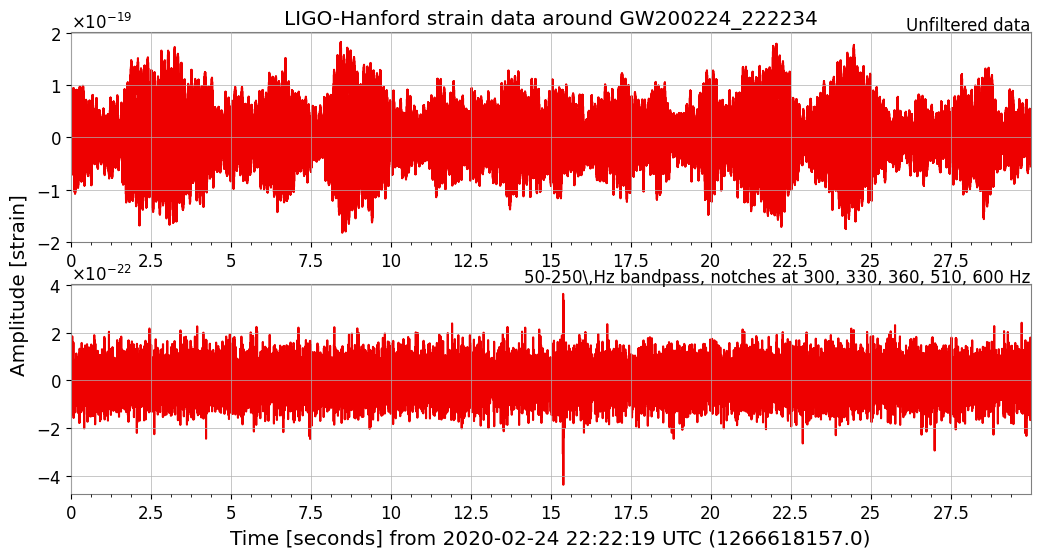

In [8]:
from gwpy.plot import Plot
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford')
ax1, ax2 = plot.axes
ax1.set_title('LIGO-Hanford strain data around GW200224_222234')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 300, 330, 360, 510, 600 Hz',
         transform=ax2.transAxes, ha='right')
plot.show()

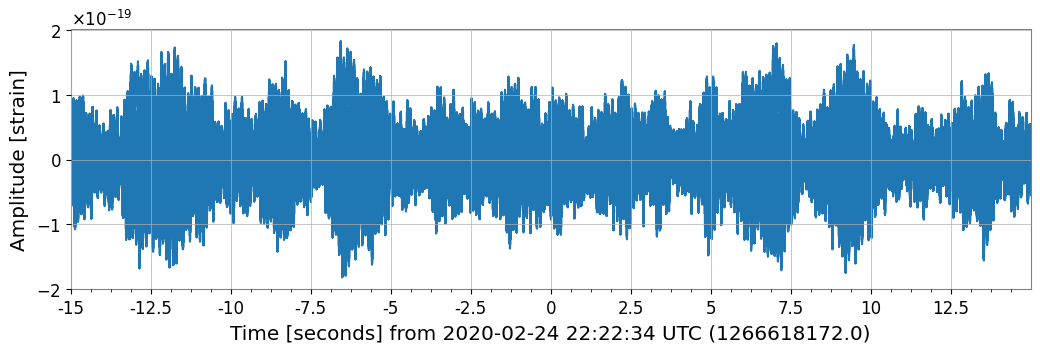

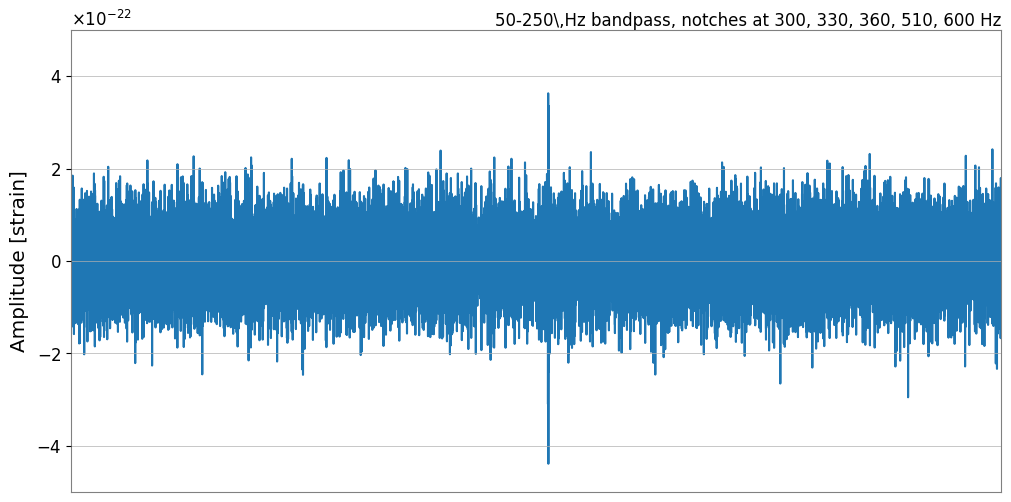

In [9]:
plot = hdata.plot() # plotting the unfiltered data

ax = plot.gca()

#limits and labels
ax.set_ylabel('Amplitude [strain]')
ax.set_xscale('seconds', epoch=1266618172)

plt.figure(figsize=[12, 6])

ax2 = plot.gca()
ax2 = plt.subplot(111)
ax2.xaxis.set_visible(False) # suppressing the x axis

#limits and labels
ax2.set_ylim(-5e-22, 5e-22)
ax2.set_xscale('seconds', epoch=1266618172)
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Amplitude [strain]')
ax2.plot(hfilt.times.value, hfilt.value, label="Filtered")


ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 300, 330, 360, 510, 600 Hz',
         transform=ax2.transAxes, ha='right')
plot.show()

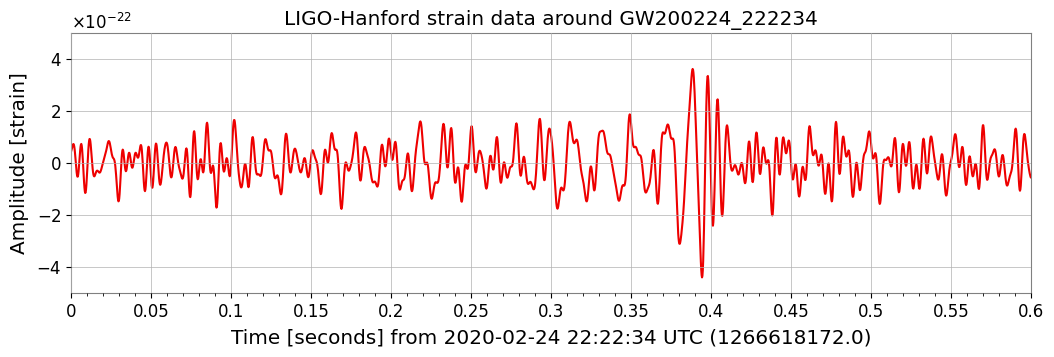

In [10]:
plot = hfilt.plot(color='gwpy:ligo-hanford')
ax = plot.gca()

#labels
ax.set_title('LIGO-Hanford strain data around GW200224_222234')
ax.set_ylabel('Amplitude [strain]')
ax.set_xscale('seconds', epoch=1266618172)

# graph limits
ax.set_ylim(-5e-22, 5e-22)
ax.set_xlim(1266618172, 1266618172.6)

plot.show()

x_val = plt.gca().lines[0].get_xdata()
y_val = plt.gca().lines[0].get_ydata()


In [11]:
ldata = TimeSeries.fetch_open_data('L1', 1266618156, 1266618188) #getting the data from around the signal from livingston
lfilt = ldata.filter(zpk, filtfilt=True)

In [12]:
lfilt.shift('6.9ms') # shift the data to account for location differences
lfilt *= -1

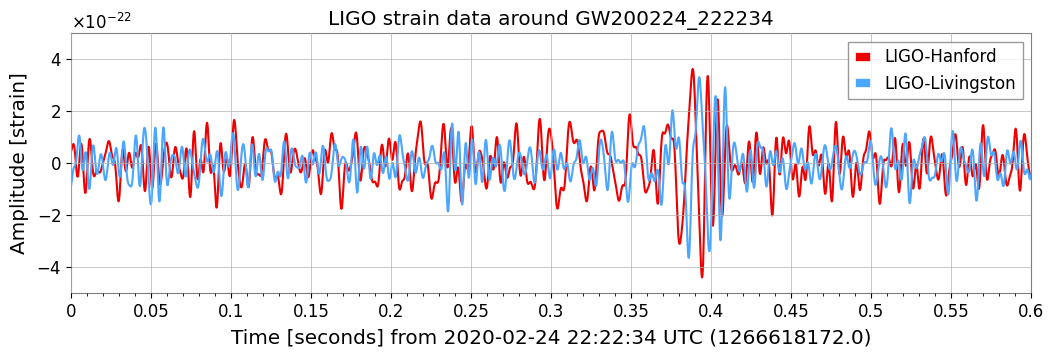

In [13]:
plot = Plot(figsize=[12, 4])
ax = plot.gca()

# labels
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford')
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston')
ax.set_title('LIGO strain data around GW200224_222234')
ax.set_xscale('seconds', epoch=1266618172)
ax.set_ylabel('Amplitude [strain]')

# graph limits
ax.set_ylim(-5e-22, 5e-22)
ax.set_xlim(1266618172, 1266618172.6)

ax.legend()
plot.show()


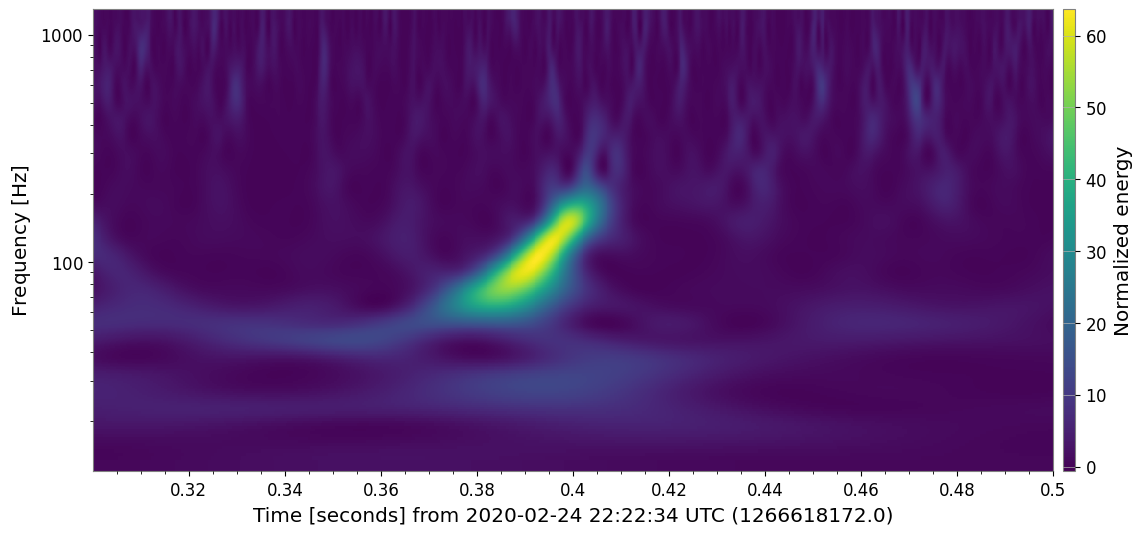

In [14]:
dt = 0.1  #-- Set width of q-transform plot, in seconds
hq = hfilt.q_transform(outseg=(t0-dt, t0+dt))
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalized energy")
ax.grid(False)
ax.set_yscale('log')

<Figure size 1000x400 with 0 Axes>

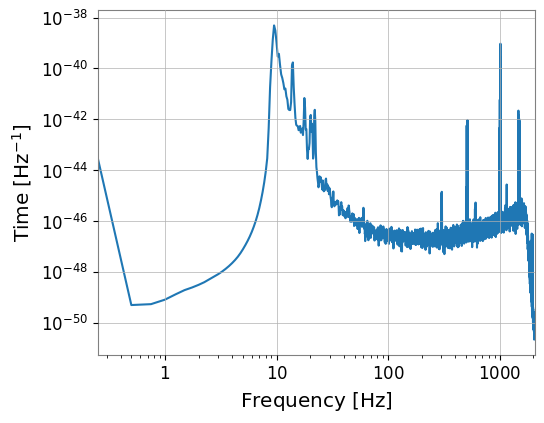

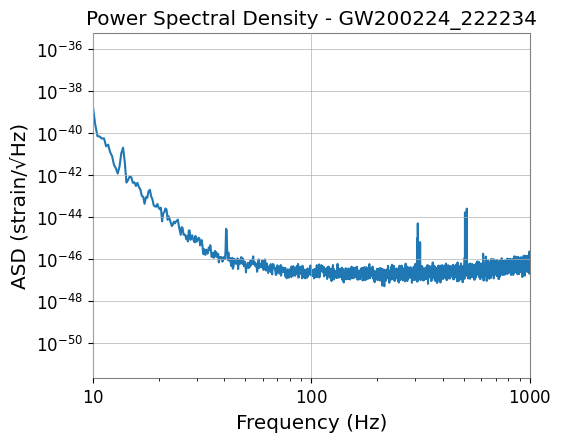

In [15]:
# Compute and plot the power spectral density
h1_psd = hdata.psd(fftlength=4)
l1_psd = ldata.psd(fftlength=4)

plt.figure(figsize=(10, 4))
h1_psd.plot(label="H1 PSD")
l1_psd.plot(label="L1 PSD")
plt.xlim(10, 1000)  # limit x-axis for a clearer view
plt.xlabel("Frequency (Hz)")
plt.ylabel("ASD (strain/√Hz)")
plt.title("Power Spectral Density - GW200224_222234")
plt.show()

In [46]:
# Get the ridge of the Q-transform (dominant frequencies over time)
ridge_frequencies = hq.max(axis=0)

# Get the ridge of the Q-transform (dominant frequencies over time)
ridge_indices = np.argmax(hq.value, axis=0) # Get indices of max values along frequency axis
ridge_frequencies = hq.frequencies.value[ridge_indices] # Get frequencies corresponding to indices

# Calculate the frequency derivative using gradient function
frequency_derivative = np.gradient(ridge_frequencies, hq.frequencies.value)
max_frequency_derivative = np.max(np.abs(frequency_derivative)) # Find the max

Maximum Frequency Derivative: 187.0


In [25]:
# Find the index of the maximum power
max_index = np.argmax(hq.value)

# Get the frequency and time corresponding to the maximum power
peak_frequency = hq.frequencies.value[max_index // hq.times.size]
peak_time = hq.times.value[max_index % hq.times.size]

print("Peak Frequency:", peak_frequency, "Hz")
print("Peak Time:", peak_time, "s")

Peak Frequency: 603.0042 Hz
Peak Time: 1266618172.3880148 s


Chirp Mass = $(\frac{c^3f_{peak}}{πG})^{-8/3}$

In [42]:
c = 3*(10**8)
G = 6.67*(10**(-11))
chirp_mass = (c**3 * peak_frequency) / (np.pi * G)
chirp_mass = chirp_mass**(-8/3)
print("Chirp Mass =", chirp_mass * u.kg)

# Assuming m1 ≈ m2 = m
m = chirp_mass * (2**(1/5)) * u.kg
print("Black Hole Mass=", m)

Chirp Mass = 9.097266676111112e-102 kg
Black Hole Mass= 1.045001526581818e-101 kg


Chirp Mass = $\frac{c^3}{G}(\frac{5}{96}\pi^{8/3}f_{peak}^{-11/3}f_{deriv})^{3/5}$

In [52]:
# trying chirp mass with a different equation
CM = (c**3/G) * (5/96*(np.pi**(-8/3))*(peak_frequency**(-11/3))*np.abs(max_frequency_derivative))
CM = CM**(3/5)
print("Chirp mass=", CM)

# Assuming m1 ≈ m2 = m
m2 = CM * (2**(1/5))
print("Black Hole Mass=", m2)

Chirp mass= 1109998594523597.6
Black Hole Mass= 1275053559578277.5


Chirp Mass = $\frac{(m_1m_2)^{3/5}}{(m_1+m_2)^{1/5}}$

we assume $m_1 = m_2 = m$

In [48]:
luminocity_distance = (CM / (peak_frequency**(8/3)))**(3/5)

print(luminocity_distance * u.Mpc)

37903.63880331152 Mpc


In [28]:
# Find the maximum absolute value of strain at Hanford
max_strain_h = np.max(np.abs(hfilt.value))

print("Maximum strain at Hanford:", max_strain_h)

Maximum strain at Hanford: 4.388426591569063e-22


In [49]:
Energy_radiated = (G * CM**(5/3) * (np.pi * peak_frequency)**(2/3) * c**(5/3) / 5) * (max_strain_h)**2

print(Energy_radiated * (u.J)) # Print energy, converting to Joules

6.292546838469273e-13 J
